# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<font size=2>
<b>Описание данных</b>
    
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах (м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
# импорт библиотек
from pandas.plotting import scatter_matrix
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set_style('darkgrid')

data = pd.read_csv('real_estate_data.csv', sep='\t')

# общая информация
data.info()
data.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9678,4,"4,150,000.00",39.40,2018-02-26T00:00:00,1,2.65,16.00,20.10,4,NaN,...,10.80,1.00,Санкт-Петербург,"33,617.00","11,907.00",0.00,nan,0.00,nan,28.00
17513,16,"3,300,000.00",48.00,2017-01-26T00:00:00,1,nan,9.00,18.00,7,NaN,...,12.00,0.00,Выборг,nan,nan,nan,nan,nan,nan,40.00
8831,1,"5,300,000.00",70.00,2017-11-10T00:00:00,2,nan,3.00,35.00,1,NaN,...,8.60,nan,Санкт-Петербург,"24,587.00","5,154.00",1.00,576.00,0.00,nan,74.00
4681,7,"3,400,000.00",31.00,2017-03-28T00:00:00,1,2.50,5.00,17.00,2,NaN,...,6.00,nan,Санкт-Петербург,"12,074.00","9,949.00",0.00,nan,1.00,726.00,355.00
20388,11,"3,050,000.00",34.60,2018-05-18T00:00:00,1,2.56,9.00,20.40,7,NaN,...,6.20,nan,Петергоф,"37,393.00","32,582.00",1.00,137.00,3.00,256.00,117.00
6579,8,"2,100,000.00",45.10,2019-03-23T00:00:00,2,nan,5.00,nan,2,False,...,6.50,1.00,Луга,nan,nan,nan,nan,nan,nan,nan
18266,14,"2,300,000.00",30.60,2018-09-24T00:00:00,1,nan,5.00,16.70,1,NaN,...,6.40,nan,Гатчина,nan,nan,nan,nan,nan,nan,24.00
5948,20,"3,790,000.00",56.90,2017-12-10T00:00:00,2,nan,18.00,nan,13,NaN,...,nan,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,44.00
21224,5,"3,650,000.00",36.50,2018-07-27T00:00:00,1,nan,15.00,18.90,15,NaN,...,10.40,2.00,посёлок Мурино,nan,nan,nan,nan,nan,nan,54.00
20066,11,"5,990,000.00",54.00,2016-05-13T00:00:00,2,nan,6.00,36.00,3,NaN,...,8.00,0.00,Санкт-Петербург,"24,505.00","5,073.00",1.00,516.00,0.00,nan,79.00


### Вывод

Исходные данные - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, представлены 22 признаками. Пропущенные значения встречаются в следующих данных:
 - *высота потолков, всего этажей в доме, жилая площадь, апартаменты, площадь кухни, число балконов, название населённого пункта, расстояние до ближайшего аэропорта, расстояние до центра города, число парков в радиусе 3 км, расстояние до ближайшего парка, расстояние до ближайшего водоёма, сколько дней было размещено объявление.*
 
Процент пропусков различен, есть как совсем незначительные - *название населённого пункта* - 0,21% пропусков, так и практически незаполенные столбцы - *апартаменты* - 88% пропущенных значений. Также можно заметить, что *дата публикации* представлена типом данных object, необходимо поменять на datetime.

Тип данных также нужно поменять на int в следующих значениях: *всего этажей в доме, число водоёмов в радиусе 3 км, число парков в радиусе 3 км и сколько дней было размещено объявление*, т.к. всё эти значения являются целыми числами. И *апартаменты* на булев тип, о чем прямо указано в исходных данных.

## Предобработка данных

### Пропущенные значения

In [2]:
percent_mis_mean = pd.DataFrame(data.isna().mean()).reset_index()
percent_mis_mean.set_axis(
    ['column_name', 'missing_value'], axis='columns', inplace=True)
percent_mis_mean.sort_values(by='missing_value', ascending=False).style.format(
    {'missing_value': '{:,.2%}'.format})

,column_name,missing_value
9,is_apartment,88.29%
18,parks_nearest,65.91%
20,ponds_nearest,61.56%
13,balcony,48.61%
5,ceiling_height,38.80%
15,airports_nearest,23.38%
16,cityCenters_nearest,23.29%
19,ponds_around3000,23.28%
17,parks_around3000,23.28%
21,days_exposition,13.42%


In [3]:
print('Средний процент пропусков в таблице составляет: {:,.2%}'.format(
    percent_mis_mean['missing_value'].mean()))

Средний процент пропусков в таблице составляет: 19.46%


#### Высота потолков

In [4]:
data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Видно, что помимо пропущенных значений встречаются единичные аномально большие значения. Высота потолков никак не может равняться 27,5 или 100 метрам. Возможно данные значения высоты заполнялись вручную, что и привело к появлению некорректных значений, либо это вызвано какой-то технической ошибкой. 

В реальной жизни высота потолков зависит, как правило, от типа/серии жилого дома, что в случае с Санкт-Петербургом особенно актуально, т.к. в историческом центре города очень много зданий построенных еще до начала XX века, причём по индивидуальным проектам, поэтому процесс точного нахождения высоты потолков будет довольно трудоёмким.

Посмотрим как отличаются значения средней высоты от медианной: 

In [5]:
data['ceiling_height'].mean()

2.77149889685604

In [6]:
data['ceiling_height'].median()

2.65

Средняя и медиана, несмотря на аномальные значения отличаются не сильно. Можно предположить, что аномальных значений немного и они не оказывают существенного влияния. Заменим пропущенные значения медианой и проверим на пропуски:

In [7]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].isna().sum()

0

#### Кол-во этажей в доме

In [8]:
data['floors_total'].value_counts()

5.00     5788
9.00     3761
16.00    1376
12.00    1362
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     833
3.00      668
7.00      592
14.00     553
18.00     505
24.00     469
8.00      390
2.00      383
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
29.00       1
60.00       1
33.00       1
52.00       1
37.00       1
34.00       1
Name: floors_total, dtype: int64

Также можно заметить единичные значения этажности, нехарактерные в целом для жилых зданий советской/российской постройки, так особенно для Санкт-Петербурга, с его высотным регламентом, ограничивающим максимальную высоту зданий.

Достоверно точно заменить такие значения не представляется возможным, процент пустых значений невелик - 0,36%, поэтому удалим строки с пропущенными значениями:

In [9]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'].isna().sum()

0

#### Жилая площадь

Пропущенных значений в столбце с жилой площадью 8%, что может оказывать влияние на дальнейшие результаты. Посчитаем количество пропущенных значений в зависимости от числа комнат:

In [10]:
data.loc[data['living_area'].isnull(), 'rooms'].value_counts()

1    647
2    634
3    442
4     90
5     33
0     11
7      6
6      6
9      1
Name: rooms, dtype: int64

Можно предположить, что как и в случае с этажностью, пропуски значений могут бьть вызваны как технической ошибкой, так и человеческим фактором - продавец вполне мог не знать точного значения жилой площади, поэтому и пропускал это поле при заполнении. Для заполнения пропущенных значений посчитаем медианные значения в зависимости от числа комнат и соответственно заполним пропущенные значения:

In [11]:
median_living_area = data.groupby('rooms')['living_area'].median()
median_living_area

rooms
0     18.00
1     17.60
2     30.50
3     45.00
4     63.50
5     91.78
6    124.40
7    145.00
8    161.00
9    179.20
10   161.40
11   133.90
12   409.70
14   195.15
15   409.00
16   180.00
19   264.50
Name: living_area, dtype: float64

In [12]:
for i in median_living_area.index:
    data.loc[(data['rooms'] == i), 'living_area'] = data.loc[(
        data['rooms'] == i), 'living_area'].fillna(median_living_area[i])

data['living_area'].isna().sum()

0

#### Площадь кухни

Таким же образом заменим пропущенные значения площади кухни, с небольшим уточнением: для квартир-студий укажем нулевую площадь кухни, т.к. данный тип недвижимости как таковой не предусматривает отдельного помещения:

In [13]:
data.loc[data['kitchen_area'].isnull(), 'rooms'].value_counts()

1    812
2    643
3    426
0    194
4     97
5     40
6      8
7      7
8      3
9      1
Name: rooms, dtype: int64

In [14]:
data.loc[data['studio'] == 1, 'kitchen_area'] = 0
data.loc[data['kitchen_area'].isnull(), 'rooms'].value_counts()

1    801
2    643
3    426
4     97
0     59
5     40
6      8
7      7
8      3
9      1
Name: rooms, dtype: int64

In [15]:
median_kitchen_area = data.groupby('rooms')['kitchen_area'].median()
median_kitchen_area

rooms
0      0.00
1      9.00
2      8.70
3      9.50
4     11.05
5     15.10
6     19.75
7     20.00
8     25.00
9     14.30
10    19.80
11    12.60
12   112.00
14    21.25
15   100.00
16    13.00
19    27.60
Name: kitchen_area, dtype: float64

In [16]:
for i in median_kitchen_area.index:
    data.loc[(data['rooms'] == i), 'kitchen_area'] = data.loc[(
        data['rooms'] == i), 'kitchen_area'].fillna(median_kitchen_area[i])

data['kitchen_area'].isna().sum()

0

#### Апартаменты

Это самый незаполенный столбец - 88% пропусков. Можно предположить, что данный параметр появился относительно недавно. Сразу поменяем тип данных в данном столбце, о чём указывается в исходных данных, а пропущенные значения заменим на False, поскольку достоверно установить принадлежность к апартаментам для всех пропусков не представляется возможным.

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')

#### Число балконов

Тут тоже довольно высок процент пропусков - почти половина значений. Этот параметр явно осознанно не заполнялся продавцами по причине отсутствия балконов. Пропуски заменим на нулевые значения:

In [18]:
data['balcony'] = data['balcony'].fillna(value=0)

#### Название населённого пункта

Процент пропущенных значений незначителен - 0,21%, а достоверно исходя из сходных данных мы не можем заполнить данные пропуски, поэтому просто удалим строки с пропущенными значениями.

In [19]:
data.dropna(subset=['locality_name'], inplace=True)

#### Расстояние до ближайшего аэропорта

Пропущена почти четверть значений - 23,4%. Пропущенные значения заменим средним в зависимости от населённого пункта:

In [20]:
data.loc[data['airports_nearest'].isnull(), 'locality_name'].value_counts()

посёлок Мурино         520
Всеволожск             398
Гатчина                307
деревня Кудрово        299
Выборг                 237
                      ... 
деревня Реброво          1
деревня Тихковицы        1
поселок Володарское      1
поселок Жилгородок       1
поселок Гладкое          1
Name: locality_name, Length: 344, dtype: int64

In [21]:
mean_airports_nearest = data.groupby('locality_name')[
    'airports_nearest'].mean()
mean_airports_nearest

locality_name
Бокситогорск           nan
Волосово               nan
Волхов                 nan
Всеволожск             nan
Выборг                 nan
                        ..
село Путилово          nan
село Рождествено       nan
село Русско-Высоцкое   nan
село Старая Ладога     nan
село Шум               nan
Name: airports_nearest, Length: 364, dtype: float64

In [22]:
data['airports_nearest'].fillna(mean_airports_nearest, inplace=True)
data['airports_nearest'].isnull().sum()

5524

In [23]:
for i in range(len(mean_airports_nearest)):
    data.loc[(data['airports_nearest'].isnull()) &
             (data['locality_name'] == mean_airports_nearest.index[i]
              ), 'airports_nearest'] = mean_airports_nearest[i]

data['airports_nearest'].isnull().sum()

5432

Число пропущенных значений расстояния изменилось незначительно, для большого числа населённых пунктов из-за недостатка исходных данных не представляется возможным рассчитать среднее значение, заменим пропущенные значения на среднее значение расстояния до аэропорта:

In [24]:
data['airports_nearest'] = data['airports_nearest'].fillna(
    data['airports_nearest'].mean())
data['airports_nearest'].isnull().sum()

0

#### Расстояние до центра города

Пропуски в значения расстояния до центра города заполним средними значениями:

In [25]:
data.loc[data['cityCenters_nearest'].isnull(), 'locality_name'].value_counts()

посёлок Мурино         520
Всеволожск             398
Гатчина                307
деревня Кудрово        299
Выборг                 237
                      ... 
деревня Курковицы        1
деревня Реброво          1
поселок Гладкое          1
поселок Володарское      1
деревня Тихковицы        1
Name: locality_name, Length: 345, dtype: int64

In [26]:
data['cityCenters_nearest'].fillna(data.groupby('locality_name')[
                                   'cityCenters_nearest'].transform('mean'), inplace=True)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(
    data['cityCenters_nearest'].mean())
data['cityCenters_nearest'].isnull().sum()

0

#### Число парков в радиусе 3 км

Столбец  с *числом парков в радиусе 3км* связан со столбцом *расстояние до ближайшего парка*. Проверим, совпадают ли пустые значения в данных столбцах:

In [27]:
data.loc[data['parks_around3000'].isna()]['parks_nearest'].unique()

array([nan])

Значения отсутствуют в обоих столбцах (что логично: нет парков, нет и расстояния до парка), поэтому заменим пропущенные значения *parks_around3000* на нулевые:

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['parks_around3000'].isnull().sum()

0

#### Число водоёмов в радиусе 3 км

Обработаем пропущенные значения аналогично *parks_around3000*

In [29]:
data.loc[data['ponds_around3000'].isna()]['ponds_nearest'].unique()

array([nan])

In [30]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)
data['ponds_around3000'].isnull().sum()

0

#### Расстояние до ближайшего парка / ближайшего водоёма

Поскольку число парков/водоёмов мы заменили нулевые значения, то и соответствующие расстояния мы примем нулевыми:

In [31]:
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
data['parks_nearest'].isnull().sum()

0

In [32]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)
data['ponds_nearest'].isnull().sum()

0

#### Сколько дней было размещено объявление

Установить связь сколько дней было размещено объявление с каким-либо другим параметром проблематично, мы располагаем только датой размещения объявления, но не датой продажи, поэтому для заполнения пропущенных значений воспользуемся медианой:

In [33]:
data.loc[data['days_exposition'].isna(
), 'days_exposition'] = data['days_exposition'].median()
# data['days_exposition'].isnull().sum()

### Замена типов данных

Выведем информацию о типах данных в таблице:

In [34]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Для дальнейшего удобства, в т.ч. и визуальной работы с таблицей, поменяем значения последней стоимости, числа этажей, балконов, расстояния до аэропорта, центра города, а также расстояния и количество парков и водоёмов на целочисленные: 

In [35]:
for column in ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest',
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']:
    data[column] = data[column].astype('int')

*first_day_exposition* переведём в *datetime*, обратив внимание на то, что в исходных данных не указано точное время размещения объвления, поэтому перевод в формат даты можно выполнить без времени:

In [36]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%d')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,9.50,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121


**Вывод**

Ещё раз посмотрим общую информацию о таблице:

In [37]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null int32
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int32
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int32
locality_name           23565 non-null object
airports_nearest        23565 non-null int32
cityCenters_nearest     23565 non-null int32
parks_around3000        23565 non-null int32
parks_nearest           23565 non-null int32
ponds_around3000     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,95
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,9.50,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121


На этапе предобработки данных мы заменили пропущенные и нулевые значения на медианные, удалили строки с пропущенными значениями, которые не можем установить достоверно. Перевели типы данных в верные и удобные для дальнейшей работы.

## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

In [38]:
data['square_meter_price'] = (
    data['last_price']/data['total_area']).astype('int')

### День недели, месяц и год публикации объявления

In [39]:
data['expos_weekday'] = data['first_day_exposition'].dt.weekday
data['expos_month'] = data['first_day_exposition'].dt.month
data['expos_year'] = data['first_day_exposition'].dt.year

### Этаж квартиры; варианты — первый, последний, другой

In [40]:
"""
напишем функцию, которая присвоет параметр этажа и добавим в исходную таблицу столбец с новым параметром
"""


def floor_group(row):
    if row['floor'] == 1:
        return 'первый этаж'
    elif row['floor'] == 1 & row['floor'] == row['floors_total']:
        # условие для одноэтажных зданий, чтобы первый этаж не оказался последним
        return 'первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'последний этаж'
    return 'другой этаж'


data['floor_group'] = data.apply(floor_group, axis=1)

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [41]:
data['ratio_living_total_area'] = (
    data['living_area']/data['total_area']).astype('float').round(2)
data['ratio_living_total_area']
data['ratio_kitchen_total_area'] = (
    data['kitchen_area']/data['total_area']).astype('float').round(2)
data['ratio_kitchen_total_area']

0       0.23
1       0.27
2       0.15
3       0.06
4       0.41
        ... 
23694   0.10
23695   0.14
23696   0.15
23697   0.30
23698   0.28
Name: ratio_kitchen_total_area, Length: 23565, dtype: float64

Для удобства работы с таблицой проведём перестановку и группировку столбцов, при визуальной работе с таблицей гораздо удобнее видить рядом площади и их отношения, кол-во этажей и расположение квартиры и т.д.
*

In [42]:
data = data[['total_images', 'last_price', 'square_meter_price', 'total_area', 'living_area', 'ratio_living_total_area',
             'kitchen_area', 'ratio_kitchen_total_area', 'rooms', 'ceiling_height', 'is_apartment', 'studio', 'open_plan',
             'balcony', 'floor', 'floors_total', 'floor_group', 'locality_name', 'airports_nearest', 'cityCenters_nearest',
             'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'first_day_exposition',
             'days_exposition', 'expos_weekday', 'expos_month', 'expos_year']]

pd.set_option('display.max_columns', None)
# data.head(30)

## Гистограммы

### Площадь

In [43]:
data['total_area'].describe()

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

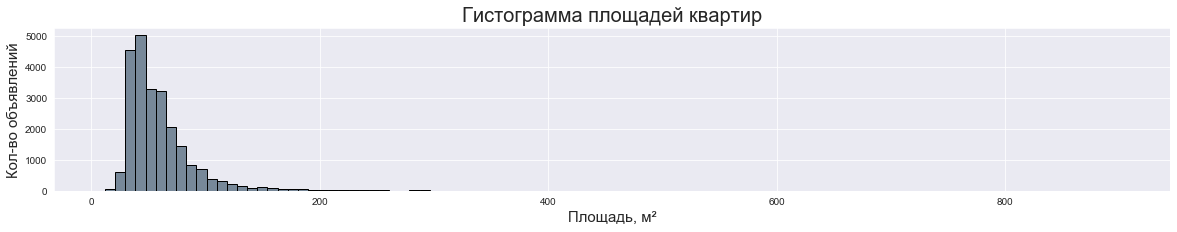

In [44]:
data['total_area'].hist(bins=100, figsize=(
    20, 3), color='lightslategrey', edgecolor='k')
plt.title("Гистограмма площадей квартир", size=20)
plt.xlabel("Площадь, м²", size=15)
plt.ylabel("Кол-во объявлений", size=15)
plt.show()

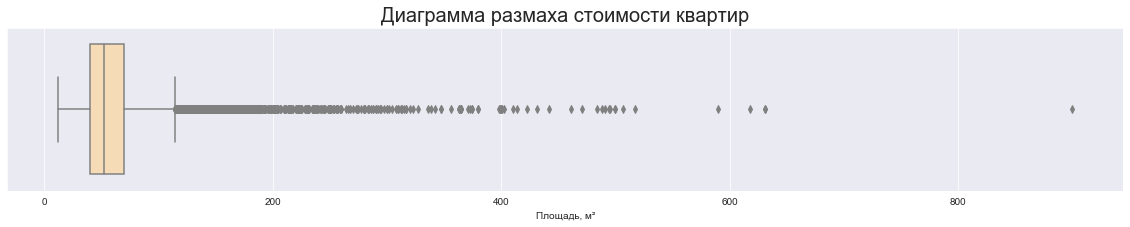

In [45]:
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['total_area'], color='navajowhite')
plt.title("Диаграмма размаха стоимости квартир", size=20)
plt.xlabel("Площадь, м²")
plt.show()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> 

Добавь на все свои графики:
- подписи осей
- заголовки
- легенду, где требуется
- единицы измерения
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправляюсь, добавляю описания ко всему, что визуализировал в этой работе.</div>


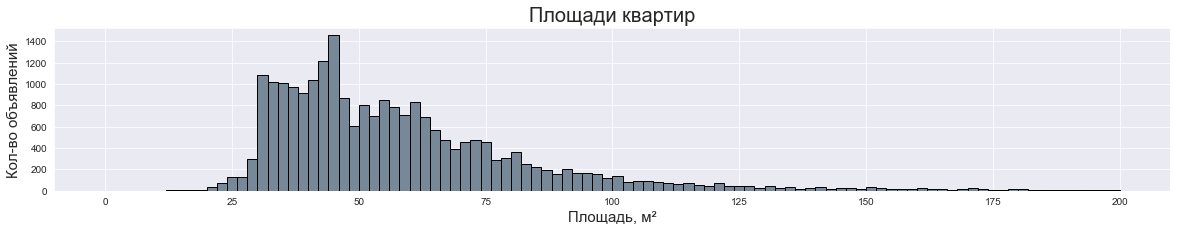

In [46]:
data['total_area'].hist(bins=100, range=(0, 200), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')
plt.title("Площади квартир", size=20)
plt.xlabel("Площадь, м²", size=15)
plt.ylabel("Кол-во объявлений",  size=15)
plt.show()

Больше всего квартир продаётся в диапазоне площади 40...60м². С ростом площади квартиры значительно падает, почти нулевые значения при площади от 250м². Значения выбросов в диапазоне от ~150м², сразу же избавимся от них.

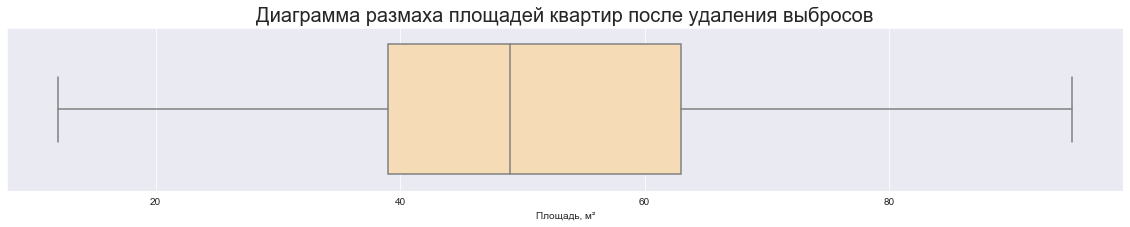

In [47]:
data.drop(data[data['total_area'] > 95].index, inplace=True)
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['total_area'], color='navajowhite')
plt.title("Диаграмма размаха площадей квартир после удаления выбросов", size=20)
plt.xlabel("Площадь, м²")
plt.show()

### Цена

In [48]:
data['last_price'].describe()

count       21,354.00
mean     4,965,509.59
std      2,786,685.97
min        430,000.00
25%      3,300,000.00
50%      4,400,000.00
75%      5,988,750.00
max     53,000,000.00
Name: last_price, dtype: float64

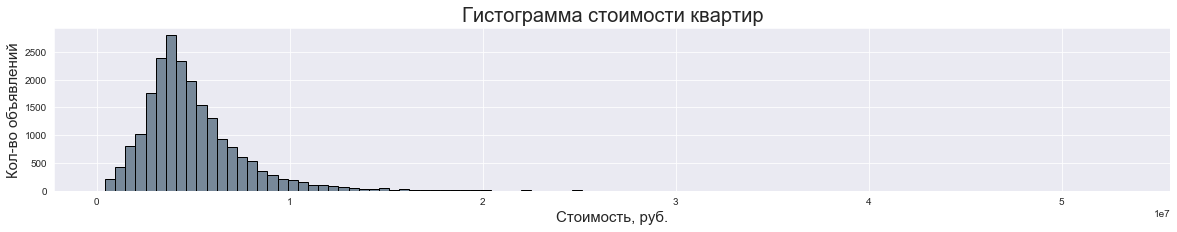

In [49]:
data['last_price'].hist(bins=100, figsize=(
    20, 3), color='lightslategrey', edgecolor='k')
plt.title("Гистограмма стоимости квартир", size=20)
plt.xlabel("Стоимость, руб.", size=15)
plt.ylabel("Кол-во объявлений", size=15)
plt.show()

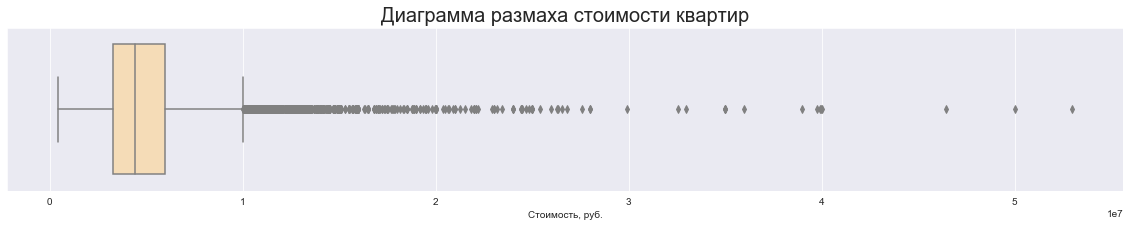

In [50]:
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['last_price'], color='navajowhite')
plt.title("Диаграмма размаха стоимости квартир", size=20)
plt.xlabel("Стоимость, руб.")
plt.show()

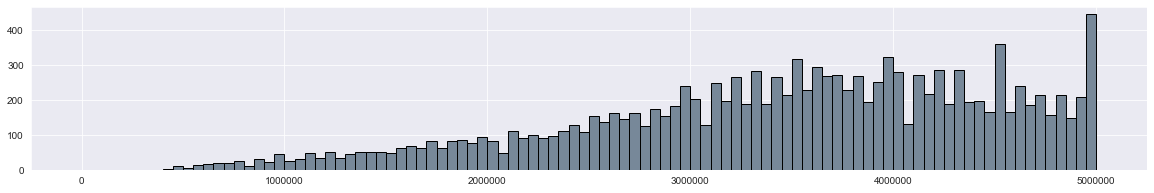

In [51]:
# для наглядности разделим гистограмму стоимости квартир
data['last_price'].hist(bins=100, range=(0, 5000000), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')

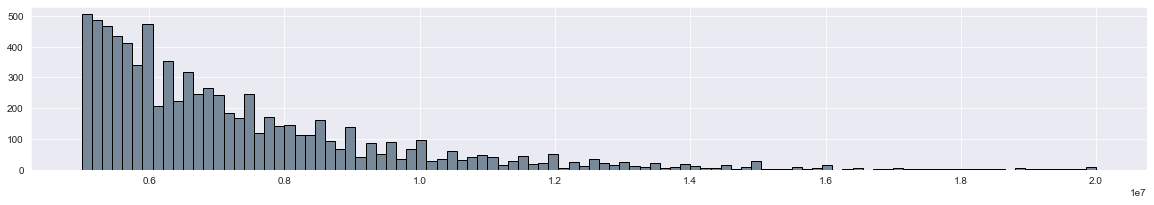

In [52]:
data['last_price'].hist(bins=100, range=(5000000, 20000000), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')

Удалим выбросы:

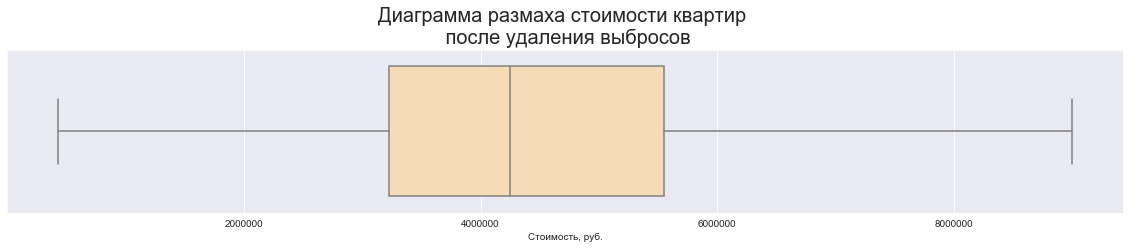

count      19,950.00
mean    4,456,094.73
std     1,765,332.87
min       430,000.00
25%     3,230,000.00
50%     4,250,000.00
75%     5,550,000.00
max     9,000,000.00
Name: last_price, dtype: float64

In [53]:
data.drop(data[data['last_price'] > 9000000].index, inplace=True)
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['last_price'], color='navajowhite')
plt.title("Диаграмма размаха стоимости квартир \n после удаления выбросов", size=20)
plt.xlabel("Стоимость, руб.")
plt.show()
data['last_price'].describe()

По стоимости же больше всего продаётся квартир за 3...4 млн. руб.

### Число комнат

In [54]:
data['rooms'].describe()

count   19,950.00
mean         1.85
std          0.85
min          0.00
25%          1.00
50%          2.00
75%          2.00
max          6.00
Name: rooms, dtype: float64

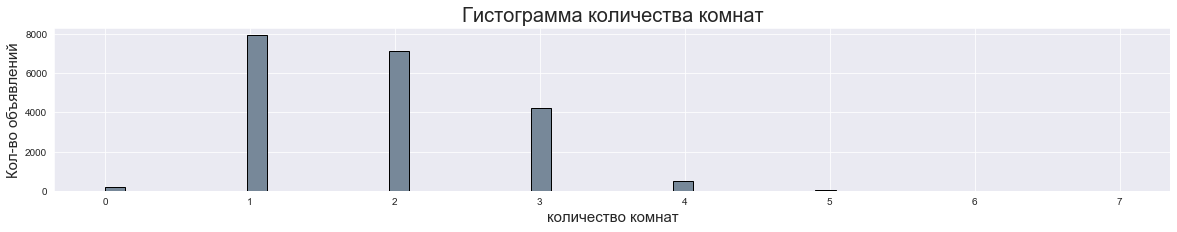

In [55]:
data['rooms'].hist(bins=50, range=(0, 7), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')
plt.title("Гистограмма количества комнат", size=20)
plt.xlabel("количество комнат", size=15)
plt.ylabel("Кол-во объявлений", size=15)
plt.show()

Больше всего продаётся однокомнатных квартир, немногим меньше двухкомнатных, на третьем месте трёхкомнатные квартиры. Остальных вариантов квартир продано значительно меньше.

### Высота потолков

In [56]:
data['ceiling_height'].describe()

count   19,950.00
mean         2.68
std          0.76
min          1.00
25%          2.58
50%          2.65
75%          2.65
max         32.00
Name: ceiling_height, dtype: float64

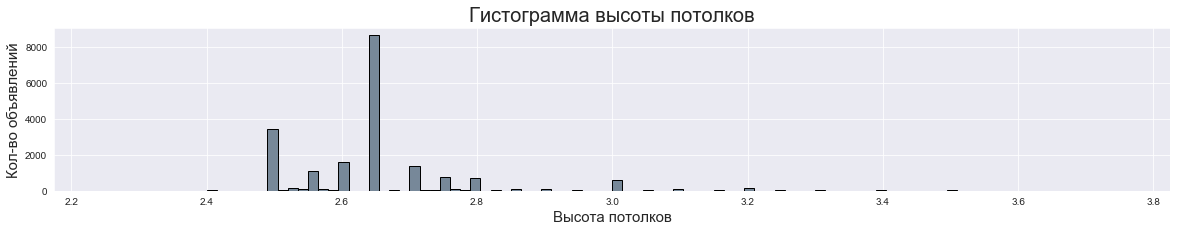

In [57]:
data['ceiling_height'].hist(bins=100, range=(2.25, 3.75), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')
plt.title("Гистограмма высоты потолков", size=20)
plt.xlabel("Высота потолков", size=15)
plt.ylabel("Кол-во объявлений", size=15)
plt.show()

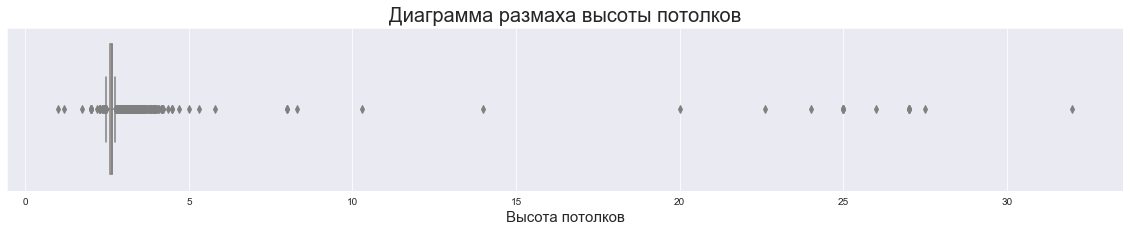

count   19,950.00
mean         2.68
std          0.76
min          1.00
25%          2.58
50%          2.65
75%          2.65
max         32.00
Name: ceiling_height, dtype: float64

In [58]:
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['ceiling_height'], color='navajowhite')
plt.title("Диаграмма размаха высоты потолков", size=20)
plt.xlabel("Высота потолков", size=15)
plt.show()
data['ceiling_height'].describe()

Пик наблюдений на отметке в ~2,65 метра, но также есть данные по высоте потолков более 3 метров. Избавимся от аномальных значений.

*p.s. верхнюю границу в 4 метра я решил оставить по причине того, что всё таки архив объявлений у нас по Санкт-Петербургу, а в старых зданиях нередко бывает, что высота потолков бывает больше 3 метров*

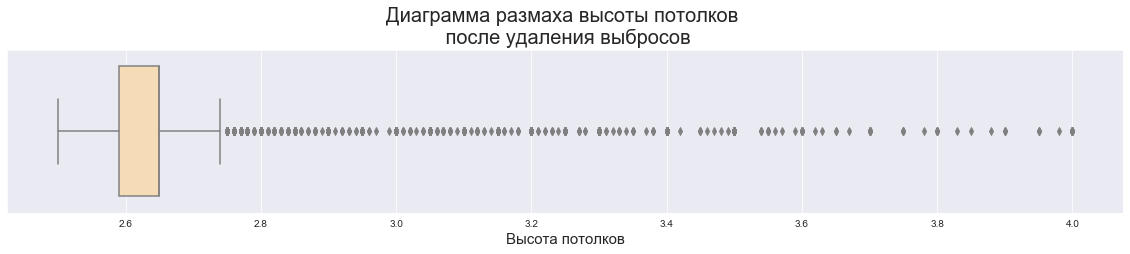

count   19,837.00
mean         2.66
std          0.16
min          2.50
25%          2.59
50%          2.65
75%          2.65
max          4.00
Name: ceiling_height, dtype: float64

In [59]:
data.drop(data[data['ceiling_height'] < 2.5].index, inplace=True)
data.drop(data[data['ceiling_height'] > 4].index, inplace=True)
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['ceiling_height'], color='navajowhite')
plt.title("Диаграмма размаха высоты потолков \n после удаления выбросов", size=20)
plt.xlabel("Высота потолков", size=15)
plt.show()
data['ceiling_height'].describe()

**Вывод**

В продаже встречаются квартиры площадью от 12 до 900 м², среднее и медианное значение площадей 60м² и 52м² соответственно. Средняя стоимостью квартиры составляет 4,6 млн.руб., медианная - 4,3 млн.руб. Больше всего продаётся одно- и двухкомнатных квартир. Высота потолков составляет в среднем 2,7м, по медиане - 2,65м. 

В данных встречаются аномальные значения, 19-ти комнатная комнатная квартира или квартира с высотой потолков в 100м выглядят не очень реально. Возможно это техническая ошибка или человеческий фактор, более точно об этом мы могли бы узнать у специалистов, подготовивших исходные данные.

## Исследовательский анализ данных

### Время продажи квартиры

Посчитаем среднее, медиану и построим гистограмму: 

In [60]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

159.50436053838786
95.0


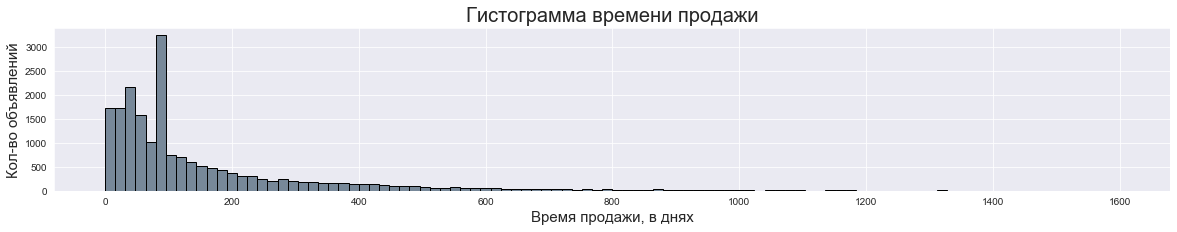

In [61]:
data['days_exposition'].hist(bins=100, range=(0, 1600), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')
plt.title("Гистограмма времени продажи", size=20)
plt.xlabel("Время продажи, в днях", size=15)
plt.ylabel("Кол-во объявлений", size=15)
plt.show()

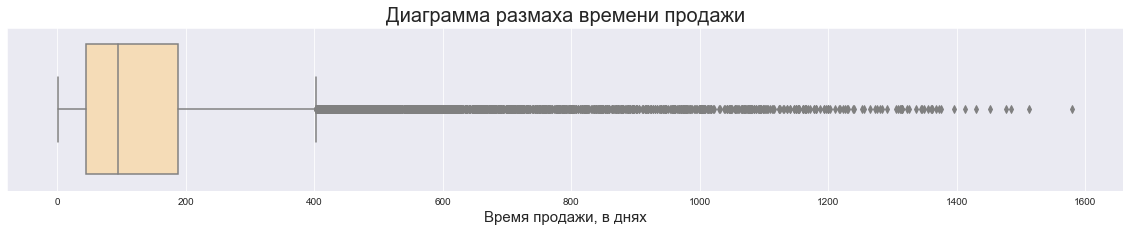

In [62]:
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=data['days_exposition'], color='navajowhite')
plt.title("Диаграмма размаха времени продажи", size=20)
plt.xlabel("Время продажи, в днях", size=15)
plt.show()

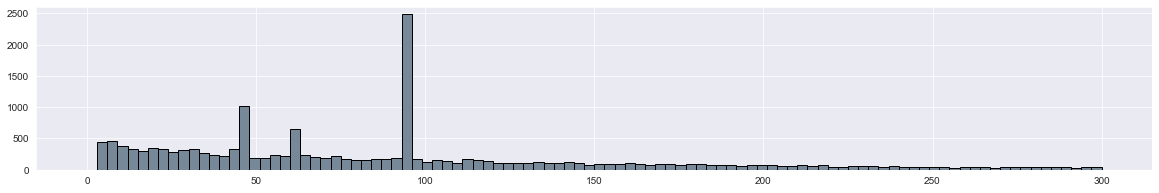

In [63]:
# изменим масштаб графика
data['days_exposition'].hist(bins=100, range=(0, 300), figsize=(
    20, 3), color='lightslategrey', edgecolor='k')

Мы можем увидеть, что больше всего продаж приходится ориентировочно на 90, 45 и 60 дней. Однако однозначно утверждать, что данные значения выбросы мы не можем. В целом же большая часть значений находится в диапазоне до 200 дней.

In [64]:
data['days_exposition'].describe()

count   19,837.00
mean       159.50
std        194.62
min          1.00
25%         45.00
50%         95.00
75%        188.00
max      1,580.00
Name: days_exposition, dtype: float64

Как видим, стандартное отклонение велико, медиана меньше в два раза, большая часть выбросов лежит за диапазоном значений в 400 дней. Избавимся от них.

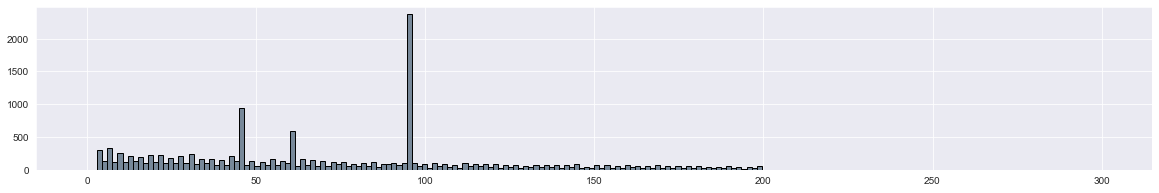

In [65]:
days_exposition = data.query('days_exposition < 200')
days_exposition['days_exposition'].hist(bins=200, range=(
    0, 300), figsize=(20, 3), color='lightslategrey', edgecolor='k')

In [66]:
days_exposition['days_exposition'].describe()

count   15,170.00
mean        74.57
std         48.50
min          1.00
25%         35.00
50%         69.00
75%         95.00
max        199.00
Name: days_exposition, dtype: float64

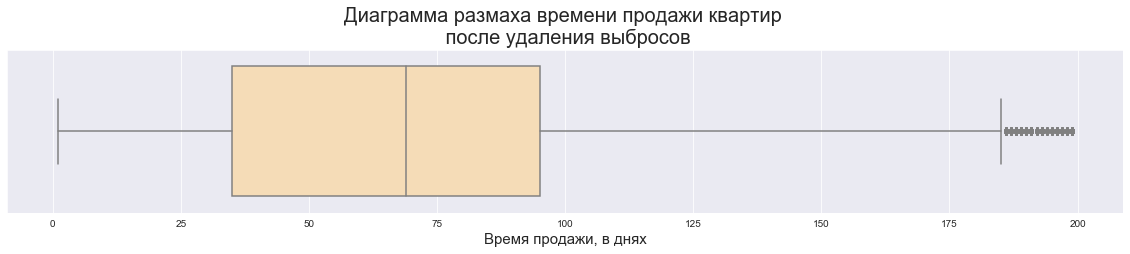

In [67]:
bx = plt.figure(figsize=(20, 3))
bx = sns.boxplot(x=days_exposition['days_exposition'], color='navajowhite')
plt.title(
    "Диаграмма размаха времени продажи квартир \n после удаления выбросов", size=20)
plt.xlabel("Время продажи, в днях", size=15)
plt.show()

Среднее время продажи квартиры 74 днz, медианное - 69 дней.

Но мы всё также видим пиковые значения на 45, 60 и 90 дней. Значение очень характерные и действительно, посмотрев [Условия размещения](https://yandex.ru/support/realty/owner/home/add-ads-housing.html) объявления на сайте Яндекс.Недвижимость мы можем увидеть, что в зависимости от стоимости квартиры, объявления размещаются как раз на такой срок и затем, соответственно снимаются с публикации. Однако однозначно утверждать, что в эти даты объявления были просто сняты с продажи нельзя, возможно, что продавцы после продажи просто не стали утруждать себя самостоятельным снятием объявления с продажи.

### Какие факторы больше всего влияют на стоимость квартиры

#### Зависимость цены от квадратного метра

In [68]:
data['last_price'].corr(data['total_area']).round(3)

0.619

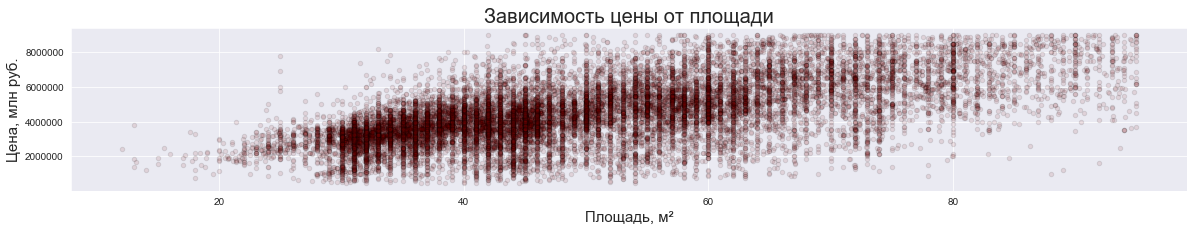

In [69]:
data.plot(x='total_area', y='last_price', kind='scatter',
          alpha=0.1, figsize=(20, 3), color='maroon', edgecolor='k')
plt.title('Зависимость цены от площади', size=20)
plt.xlabel('Площадь, м²', size=15)
plt.ylabel('Цена, млн руб.', size=15)
plt.show()

Можем заметить положительную линейную зависимость, основной массив приходится на квартиры площадью ~30...45м² стоимостью 2...5млн.руб., а с увеличением площади стоимость квартир также увеличивается.

#### Зависимость от числа комнат

In [70]:
data['last_price'].corr(data['rooms']).round(3)

0.384

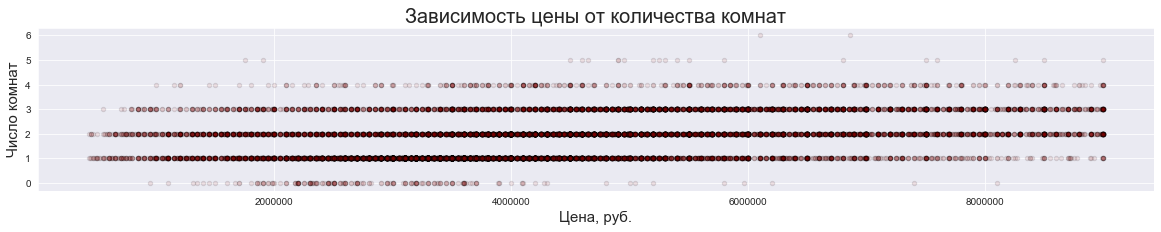

In [71]:
data.plot(x='last_price', y='rooms', kind='scatter',
          alpha=0.1, figsize=(20, 3), c='maroon', ec='k')
plt.title('Зависимость цены от количества комнат', size=20)
plt.xlabel('Цена, руб.', size=15)
plt.ylabel('Число комнат', size=15)
plt.show()

От числа комнат стоимость квартиры не так зависит, как от площади. Основной массив приходится наблюдаем по 1...3-х комнатным квартирам, причём имеем значительный разброс цен.

#### Зависимость от этажа

In [72]:
floors = data.pivot_table(
    index='floor_group', values='last_price', aggfunc='count')

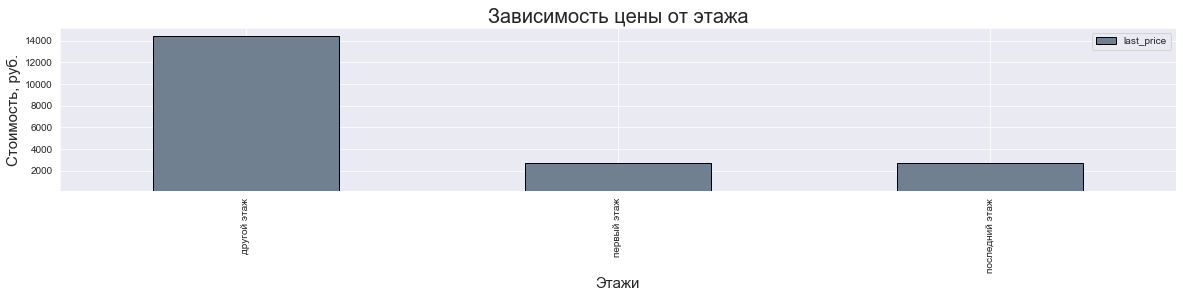

In [73]:
floors.plot(kind='bar', figsize=(20, 3), color='slategrey', edgecolor='k')
plt.ylim(bottom=100)
plt.title('Зависимость цены от этажа', size=20)
plt.xlabel('Этажи', size=15)
plt.ylabel('Стоимость, руб.', size=15)
plt.show()

Как видим, первый и последний этажи не пользуются спросом, что логично: бытовые шумы, траффик, риски коммунальных аварий, слабая освещённость, отсутствие балкона, доступность для воров и недоступность, в случае поломки лифта, даже беглое вспоминание возможных минусов крайних этажей даёт понимание почему их недолюбливают. 

#### Зависимость от удалённости от центра

In [74]:
data['last_price'].corr(data['cityCenters_nearest']).round(3)

-0.207

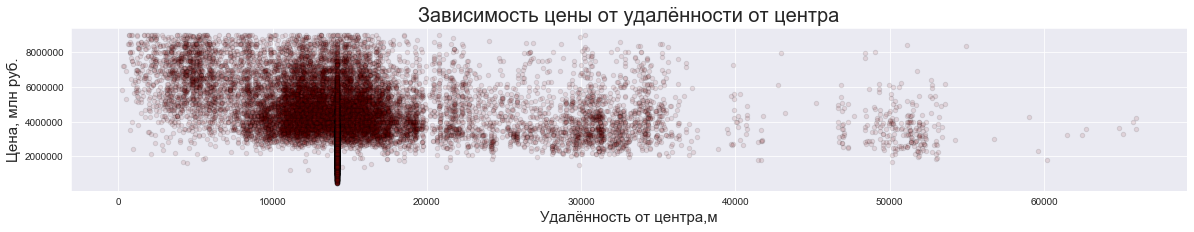

In [75]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter',
          alpha=0.1, figsize=(20, 3), color='maroon', edgecolor='k', legend=True)
plt.title('Зависимость цены от удалённости от центра', size=20)
plt.xlabel('Удалённость от центра,м', size=15)
plt.ylabel('Цена, млн руб.', size=15)
plt.show()

Видим слабую отрицательную зависимость, снижение цены при удалении от центра города незначительное. И аномально большое количество  значений на отметке 15км, связано это с тем, что число пропусков расстояний до центра в исходных данных было значительное, мы заменили их на среднее значение. Если бы распологали более точными исходными данными, хотя бы разбивкой по районам города, то могли бы избежать данной аномалии.

#### Зависимость от даты размещения

##### День недели

In [76]:
day = data.pivot_table(index='expos_weekday',
                       values='last_price', aggfunc='count')

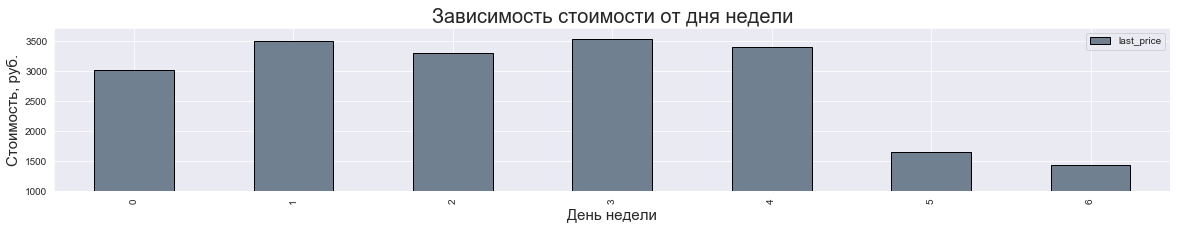

In [77]:
day.plot(kind='bar', figsize=(20, 3), color='slategrey', edgecolor='k')
plt.ylim(bottom=1000)
plt.title('Зависимость стоимости от дня недели', size=20)
plt.xlabel('День недели', size=15)
plt.ylabel('Стоимость, руб.', size=15)
plt.show()

##### Месяц

In [78]:
month = data.pivot_table(
    index='expos_month', values='last_price', aggfunc='count')

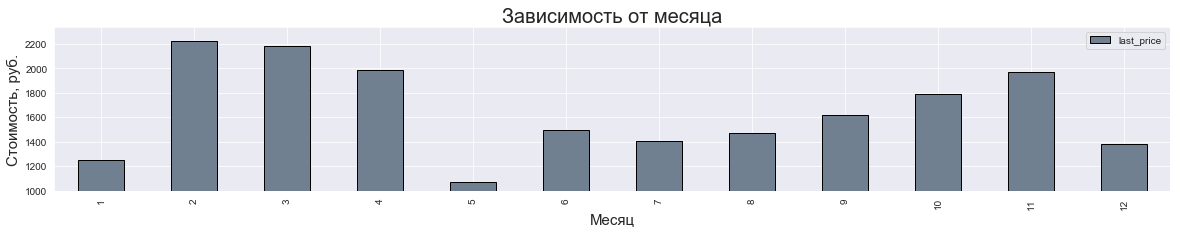

In [79]:
ax = month.plot(kind='bar', figsize=(20, 3), color='slategrey', edgecolor='k')
plt.ylim(bottom=1000)
ax.xaxis.label.set_rotation(0)
plt.title('Зависимость от месяца', size=20)
plt.xlabel('Месяц', size=15)
plt.ylabel('Стоимость, руб.', size=15)
plt.show()

В аутсайдерах декабрь, январь и май - предновогодние хлопоты, новогодние каникулы и майские праздники не располагают к продаже, люди предпочитают в эти месяцы отдыхать. Также заметна просадка в летний сезон - сезон отпусков, минимальные значения как раз приходятся на три летних месяца. Наиболеее активны люди в конец зимы (февраль) - начало весны и с сентября по ноябрь. Вожможно, на снижение цен в эти месяцы влияет падающий покупательский спрос, люди и хотят продать квартиру, и неготовы ждать по полгода, поэтому и сильно снижают цену.

##### Год

In [80]:
year = data.pivot_table(
    index='expos_year', values='last_price', aggfunc='count')

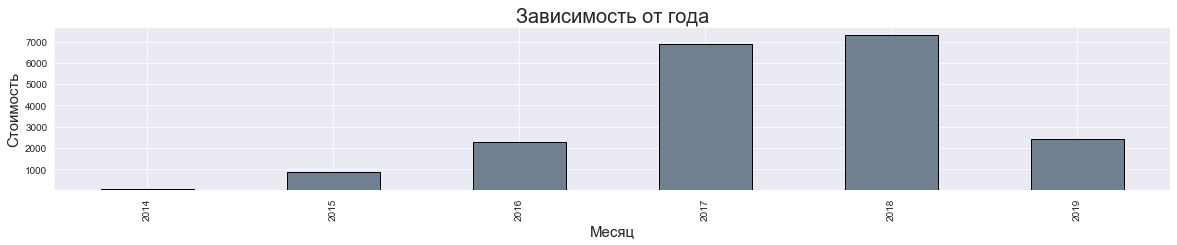

In [81]:
ax = year.plot(kind='bar', figsize=(20, 3), color='slategrey', edgecolor='k')
plt.ylim(bottom=10)
ax.legend_.remove()
plt.title('Зависимость от года', size=20)
plt.xlabel('Месяц', size=15)
plt.ylabel('Стоимость', size=15)
plt.show()

In [82]:
data['expos_year'].value_counts()

2018    7300
2017    6881
2019    2420
2016    2282
2015     879
2014      75
Name: expos_year, dtype: int64

Малые значения за 2014-2016 годы можно объяснить тем, что сервис Яндекс.Недвижимость [наращивал свой функционал](https://ru.wikipedia.org/wiki/Яндекс.Недвижимость) постепенно, конец 2014 года это как раз период открытия конечным пользователям возможности самостоятельно публиковать объявления, т.е. как таковой большой базы объявлений скорее всего могло и не быть. А данных за 2019 год мало по причине того, что учебный датасет просто давно не обновлялся, по этой же причине, скорее всего, мы совсем не наблюдаем данных за 2020 и 2021 годы.

In [83]:
print('Коэффициент корреляции стоимости от года:',
      data['last_price'].corr(data['expos_year']).round(3))
print('Коэффициент корреляции стоимости от месяца:',
      data['last_price'].corr(data['expos_month']).round(3))
print('Коэффициент корреляции стоимости от дня недели:',
      data['last_price'].corr(data['expos_weekday']).round(3))

Коэффициент корреляции стоимости от года: 0.024
Коэффициент корреляции стоимости от месяца: -0.001
Коэффициент корреляции стоимости от дня недели: -0.012


### 10 населённых пунктов с наибольшим числом объявлений

In [126]:
top_of_locality_name = (data.groupby('locality_name')['square_meter_price']
                        .agg(['mean', 'count']).round(2)).sort_values(by='count', ascending=False).head(10)
top_of_locality_name

,mean,count
locality_name,,
Санкт-Петербург,"104,067.98",12233
посёлок Мурино,"85,694.78",517
посёлок Шушары,"78,645.60",429
Всеволожск,"66,650.85",381
Колпино,"75,392.63",330
посёлок Парголово,"90,665.53",319
Пушкин,"99,528.38",313
Гатчина,"68,462.85",297
деревня Кудрово,"92,197.14",294


In [120]:
top_of_locality_name['mean'].mean().round(2)

100252.0

Тут всё логично, наибольшее число объявлений относится к самому Петербургу, его городам-спутникам и крупным городам области. Чем ближе к Санкт-Петербургу, тем выше стоимость квадратного метра. Усреднённая стоимость квадратного метра по первой десятке: 81976.85руб.

In [125]:
top_of_locality_name.sort_values(by='mean', ascending=False)

,mean,count
locality_name,,
посёлок Лисий Нос,"121,615.50",2
Санкт-Петербург,"104,067.98",12233
Зеленогорск,"100,123.45",20
Сестрорецк,"99,712.61",150
Пушкин,"99,528.38",313
Кудрово,"99,482.82",167
посёлок Левашово,"96,997.00",1
деревня Мистолово,"95,629.90",10
Мурино,"93,165.27",33


Самое дорогое жильё в Петербурге, а наименьшая стоимость жилья в Выборге, что неудивительно, т.к. из десятки городов это самый удалённый от северной столицы город.

<div class="alert alert-info"> <b>Добавляю исследовательский анализ для объявлений в Санкт-Петербурге:

### Какие факторы больше всего влияют на стоимость квартиры в Санкт-Петербурге


In [88]:
spb_flat = data.query(
    'locality_name == "Санкт-Петербург"').reset_index(drop=True)
# spb_flat['locality_name'].value_counts()
spb_flat.head()

,total_images,last_price,square_meter_price,total_area,living_area,ratio_living_total_area,kitchen_area,ratio_kitchen_total_area,rooms,ceiling_height,is_apartment,studio,open_plan,balcony,floor,floors_total,floor_group,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,expos_weekday,expos_month,expos_year
0,10,5196000,92785,56.00,34.30,0.61,8.30,0.15,2,2.65,False,False,False,0,4,5,другой этаж,Санкт-Петербург,21741,13933,1,90,2,574,2015-08-20,558,3,8,2015
1,5,7915000,110544,71.60,30.50,0.43,18.90,0.26,2,2.65,False,False,False,2,22,24,другой этаж,Санкт-Петербург,23982,11634,0,0,0,0,2019-04-18,95,3,4,2019
2,18,5400000,88524,61.00,43.60,0.71,6.50,0.11,3,2.50,False,False,False,2,7,9,другой этаж,Санкт-Петербург,50898,15008,0,0,0,0,2017-02-26,289,6,2,2017
3,5,5050000,127525,39.60,20.30,0.51,8.50,0.21,1,2.67,False,False,False,0,3,12,другой этаж,Санкт-Петербург,38357,13878,1,310,2,553,2017-11-16,137,3,11,2017
4,16,4650000,119230,39.00,20.50,0.53,7.60,0.19,1,2.65,False,False,False,1,5,14,другой этаж,Санкт-Петербург,12900,14259,1,590,1,296,2017-11-18,19,5,11,2017


#### Зависимость цены от квадратного метра

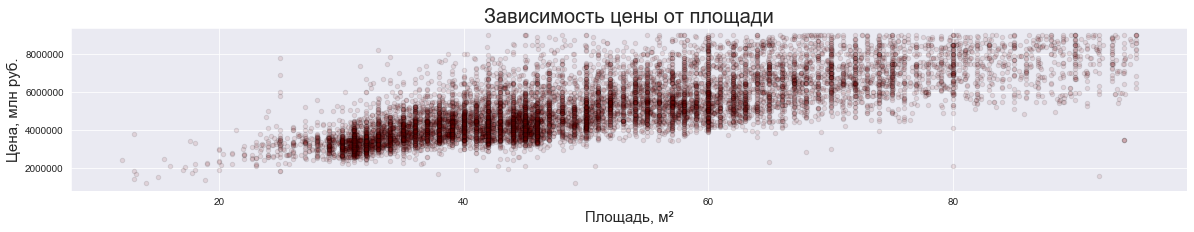

In [89]:
spb_flat.plot(x='total_area', y='last_price', kind='scatter',
              alpha=0.1, figsize=(20, 3), color='maroon', edgecolor='k')
plt.title('Зависимость цены от площади', size=20)
plt.xlabel('Площадь, м²', size=15)
plt.ylabel('Цена, млн руб.', size=15)
plt.show()

Ситуация в СПб в целом схожа с общей картиной, зависимость стоимости квартиры от площади положительная, но можно заметить смещение влево, всё же большая часть продаж приходится на интервал квартир площадью 30...50 м².

#### Зависимость цены от числа комнат

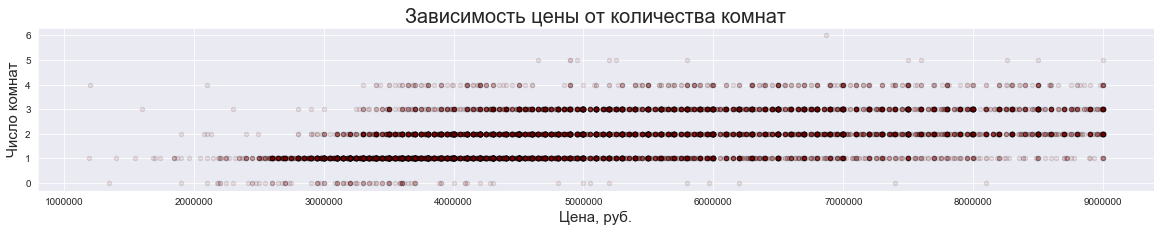

In [90]:
spb_flat.plot(x='last_price', y='rooms', kind='scatter',
              alpha=0.1, figsize=(20, 3), c='maroon', ec='k')
plt.title('Зависимость цены от количества комнат', size=20)
plt.xlabel('Цена, руб.', size=15)
plt.ylabel('Число комнат', size=15)
plt.show()

Опять можем заметить сходство с общими данными, но обращаем внимание смещенения продаж на сегмент одно- и двухкомнатных квартир и общее увеличение стоимости, что логично, всё же рассматриваем объявления в центре города, где стоимость квадратного метра жилья и его общая стоимость редко когда бывает ниже, чем в других районах города.

#### Зависимость цены от этажа

In [91]:
floors_spb = spb_flat.pivot_table(
    index='floor_group', values='last_price', aggfunc='count')

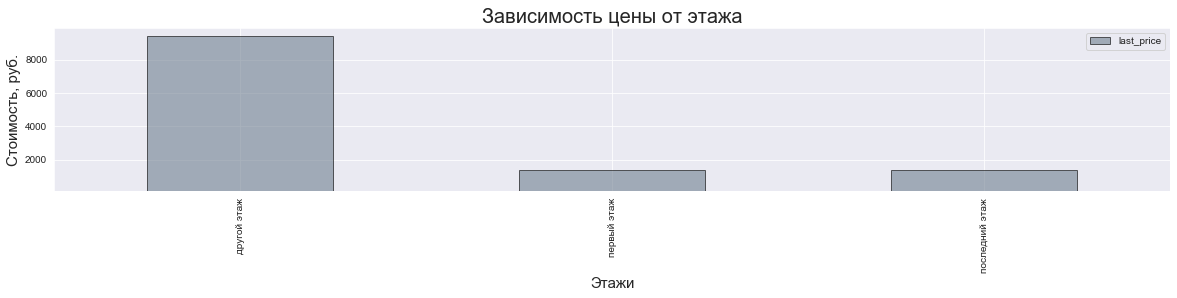

In [92]:
floors_spb.plot(kind='bar', figsize=(20, 3),
                color='slategrey', edgecolor='k', alpha=0.6)
plt.ylim(bottom=100)
plt.title('Зависимость цены от этажа', size=20)
plt.xlabel('Этажи', size=15)
plt.ylabel('Стоимость, руб.', size=15)
plt.show()

Тут также, как и по всем объявлениям, никто не любит первый и последний этажи.

#### Зависимость цены от удалённости от центра

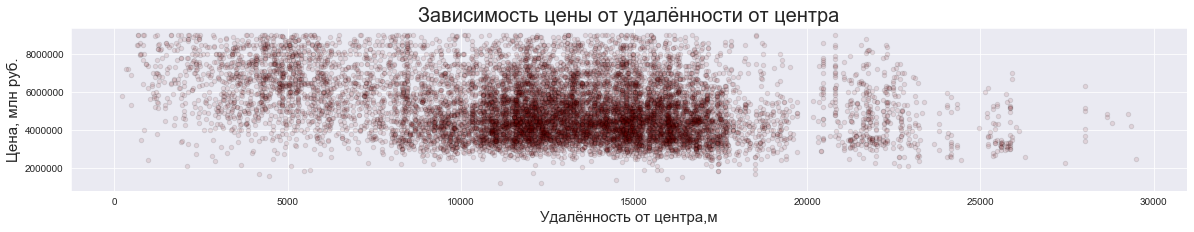

In [93]:
spb_flat.plot(x='cityCenters_nearest', y='last_price', kind='scatter',
              alpha=0.1, figsize=(20, 3), color='maroon', edgecolor='k', legend=True)
plt.title('Зависимость цены от удалённости от центра', size=20)
plt.xlabel('Удалённость от центра,м', size=15)
plt.ylabel('Цена, млн руб.', size=15)
plt.show()

Основная масса продаж приходится на квартиры  стоимостью ~3-5 млн.руб. на расстоянии 10-17км. При приближении к центру города стоимость квартир увеличивается, но число предложений уменьшается.

#### Зависимость от даты размещения

##### День недели

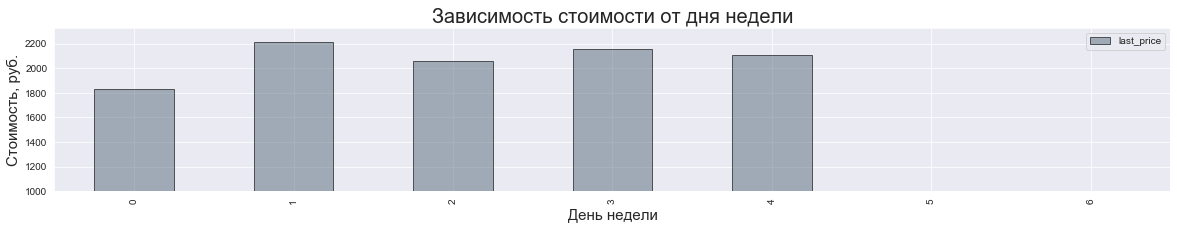

In [94]:
day_spb = spb_flat.pivot_table(
    index='expos_weekday', values='last_price', aggfunc='count')
day_spb.plot(kind='bar', figsize=(20, 3),
             color='slategrey', edgecolor='k', alpha=0.6)
plt.ylim(bottom=1000)
plt.title('Зависимость стоимости от дня недели', size=20)
plt.xlabel('День недели', size=15)
plt.ylabel('Стоимость, руб.', size=15)
plt.show()

Результат немного сбивает с толку. Сделать допущение, что в Санкт-Петербурге значительно реже предпочитают размещать объявления в выходные конечно же можно, но вот полное отсутствие результатов подозрительно. Предполагаю, что можно провести более подробное изучение исходных данных.

##### Месяц

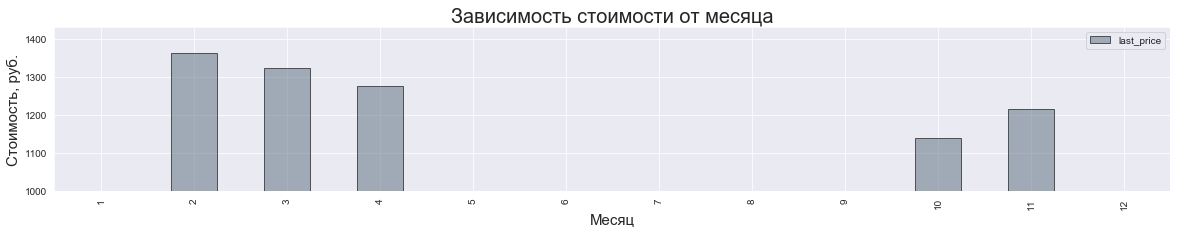

In [95]:
month_spb = spb_flat.pivot_table(
    index='expos_month', values='last_price', aggfunc='count')
month_spb.plot(kind='bar', figsize=(20, 3),
               color='slategrey', edgecolor='k', alpha=0.6)
plt.ylim(bottom=1000)
ax.xaxis.label.set_rotation(0)
plt.title('Зависимость стоимости от месяца', size=20)
plt.xlabel('Месяц', size=15)
plt.ylabel('Стоимость, руб.', size=15)
plt.show()

Для Санкт-Петербурга ситуация с месяцами повторяется в след за днями.

##### Год

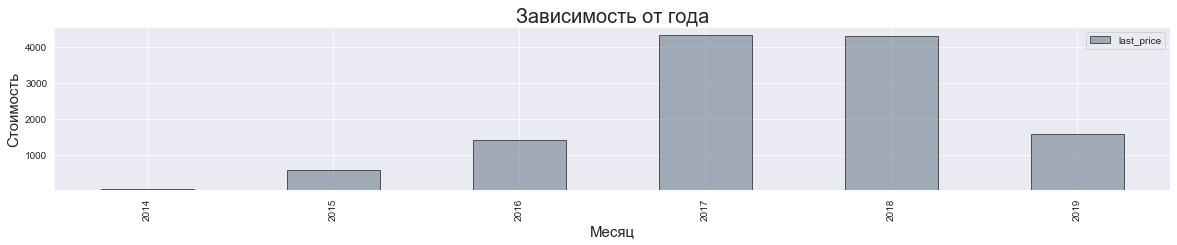

In [96]:
year_spb = spb_flat.pivot_table(
    index='expos_year', values='last_price', aggfunc='count')
year_spb.plot(kind='bar', figsize=(20, 3),
              color='slategrey', edgecolor='k', alpha=0.6)
plt.ylim(bottom=10)
plt.title('Зависимость от года', size=20)
plt.xlabel('Месяц', size=15)
plt.ylabel('Стоимость', size=15)
plt.show()

Успокаивает токо график по годам, он общего графика не наблюдаем отличий.

###  Предложения квартир в центре Санкт-Петербурга


In [97]:
# столбец с расстоянием до центра в километрах: округлите до целых значений.
spb_flat['Centers_nearest_km'] = (
    spb_flat['cityCenters_nearest'] / 1000).astype('int')

spb_flat = spb_flat[['total_images', 'last_price', 'square_meter_price', 'total_area', 'living_area', 'ratio_living_total_area',
                     'kitchen_area', 'ratio_kitchen_total_area', 'rooms', 'ceiling_height', 'is_apartment', 'studio',
                     'open_plan', 'balcony', 'floor', 'floors_total', 'floor_group', 'locality_name', 'airports_nearest',
                     'cityCenters_nearest', 'Centers_nearest_km', 'parks_around3000', 'parks_nearest', 'ponds_around3000',
                     'ponds_nearest', 'first_day_exposition', 'days_exposition', 'expos_weekday', 'expos_month', 'expos_year']]

pd.set_option('display.max_columns', None)
spb_flat.head()

,total_images,last_price,square_meter_price,total_area,living_area,ratio_living_total_area,kitchen_area,ratio_kitchen_total_area,rooms,ceiling_height,is_apartment,studio,open_plan,balcony,floor,floors_total,floor_group,locality_name,airports_nearest,cityCenters_nearest,Centers_nearest_km,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,first_day_exposition,days_exposition,expos_weekday,expos_month,expos_year
0,10,5196000,92785,56.00,34.30,0.61,8.30,0.15,2,2.65,False,False,False,0,4,5,другой этаж,Санкт-Петербург,21741,13933,13,1,90,2,574,2015-08-20,558,3,8,2015
1,5,7915000,110544,71.60,30.50,0.43,18.90,0.26,2,2.65,False,False,False,2,22,24,другой этаж,Санкт-Петербург,23982,11634,11,0,0,0,0,2019-04-18,95,3,4,2019
2,18,5400000,88524,61.00,43.60,0.71,6.50,0.11,3,2.50,False,False,False,2,7,9,другой этаж,Санкт-Петербург,50898,15008,15,0,0,0,0,2017-02-26,289,6,2,2017
3,5,5050000,127525,39.60,20.30,0.51,8.50,0.21,1,2.67,False,False,False,0,3,12,другой этаж,Санкт-Петербург,38357,13878,13,1,310,2,553,2017-11-16,137,3,11,2017
4,16,4650000,119230,39.00,20.50,0.53,7.60,0.19,1,2.65,False,False,False,1,5,14,другой этаж,Санкт-Петербург,12900,14259,14,1,590,1,296,2017-11-18,19,5,11,2017


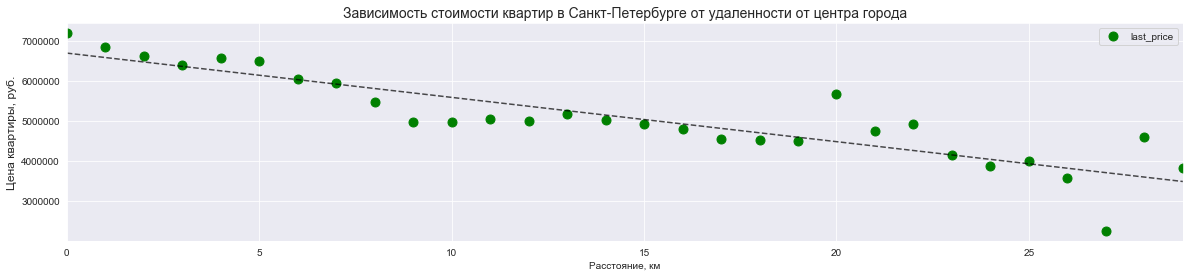

In [98]:
spb_flat_plot = spb_flat.groupby(
    ['Centers_nearest_km']).agg({'last_price': 'mean'})
spb_flat_plot.plot(figsize=(20, 4), style='go', markersize=9, grid=True)

x = spb_flat_plot.index
y = spb_flat_plot['last_price']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", color='k', alpha=0.7)
plt.title('Зависимость стоимости квартир в Санкт-Петербурге от удаленности от центра города', size=14)
plt.xlabel('Расстояние, км')
plt.ylabel('Цена квартиры, руб.', size=12)
plt.show()

Плавное снижение стоимость идёт до отметки в 3км, к 4км стоимость немного возрастает, а окончательно начинает снижаться после 6 км. Ориентируясь на эти данные примем за центр города отметку в 5км.

Дополнительно посмотрев на карте мы можем наглядно убедиться, что [5км](https://disk.yandex.ru/i/c9hKST8QXaeobw") практически полностью охватывают Исторический центр города, в отличие, например от [3км](https://disk.yandex.ru/i/rKS3RnnQlvLwZQ), куда уже не попадают значительные площади города на Васильевском и Каменном островах, а также территории до Обводного канала.

### Анализ квартир в центре города

In [99]:
spb_center = spb_flat.query('Centers_nearest_km <= 5')

spb_center = spb_center.rename(columns={'last_price': 'Стоимость', 'square_meter_price': 'Стоимость кв.м.',
                                        'total_area': 'Общая площадь', 'rooms': 'Кол-во комнат',
                                        'ceiling_height': 'Высота потолков', 'kitchen_area': 'Площадь кухни',
                                        'living_area': 'Жилая площадь', 'balcony': 'Балкон',
                                        'floor': 'Этаж', 'floor_group': 'Тип этажа',
                                        'parks_around3000': 'Число парков в радиусе 3 км',
                                        'ponds_around3000': 'Число водоёмов в радиусе 3 км',
                                        'Centers_nearest_km': 'Расстояние до центра'})
#spb_center.reset_index(drop = True).head()

Для наглядного сравнения параметров построим матрицы диаграмм рассеяния:

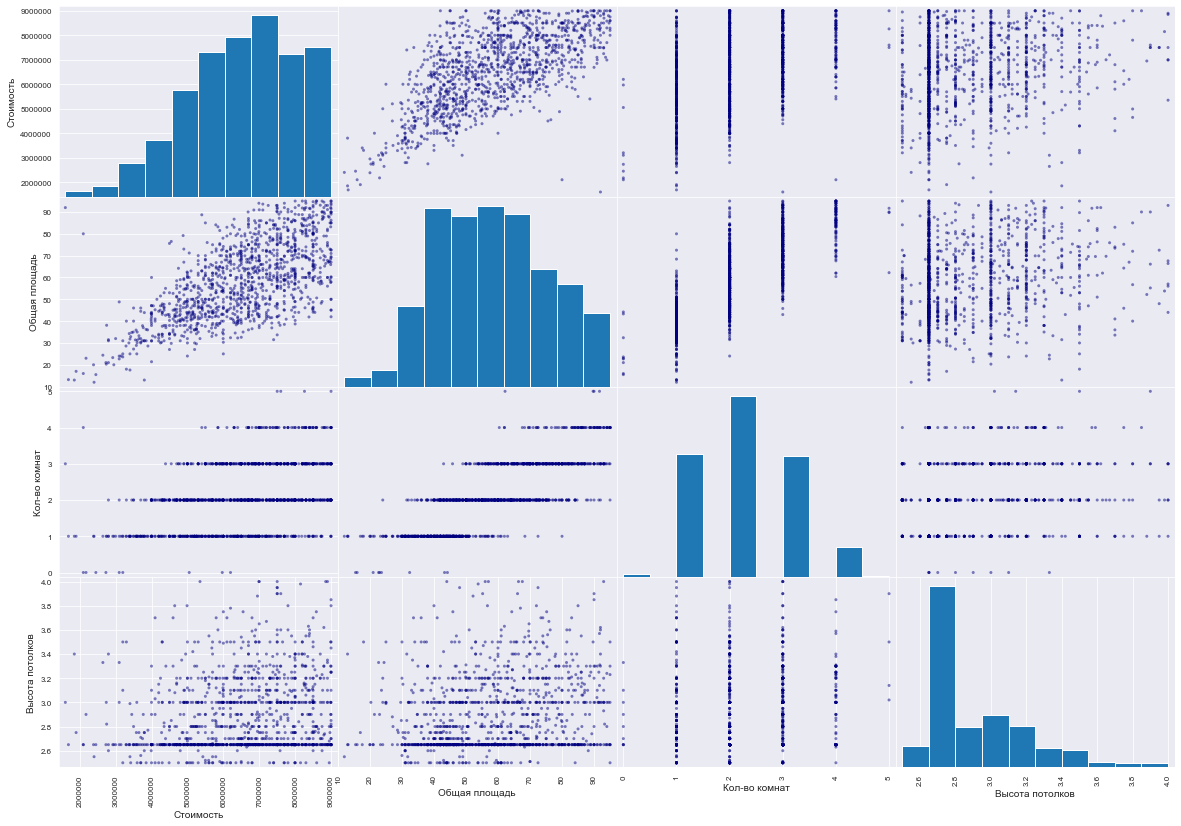

,Стоимость,Общая площадь,Кол-во комнат,Высота потолков
Стоимость,1.00,0.65,0.41,0.17
Общая площадь,0.65,1.00,0.78,0.20
Кол-во комнат,0.41,0.78,1.00,0.17
Высота потолков,0.17,0.20,0.17,1.00


In [100]:
# площадь, цена, число комнат, высота потолков
spb_flat_char = spb_center[['Стоимость',
                            'Общая площадь', 'Кол-во комнат', 'Высота потолков']]
scatter_matrix(spb_flat_char, figsize=(20, 14), color='navy')
plt.show()
spb_flat_char.corr()

Можно заметить, что для объявлений в центре Петербурга, как и для всех объявлений, сильнее всего влияет площадь квартиры.

Дополнительно посмотрим, как на стоимость могут влиять этаж, наличие балконов, удалённость от центра города.

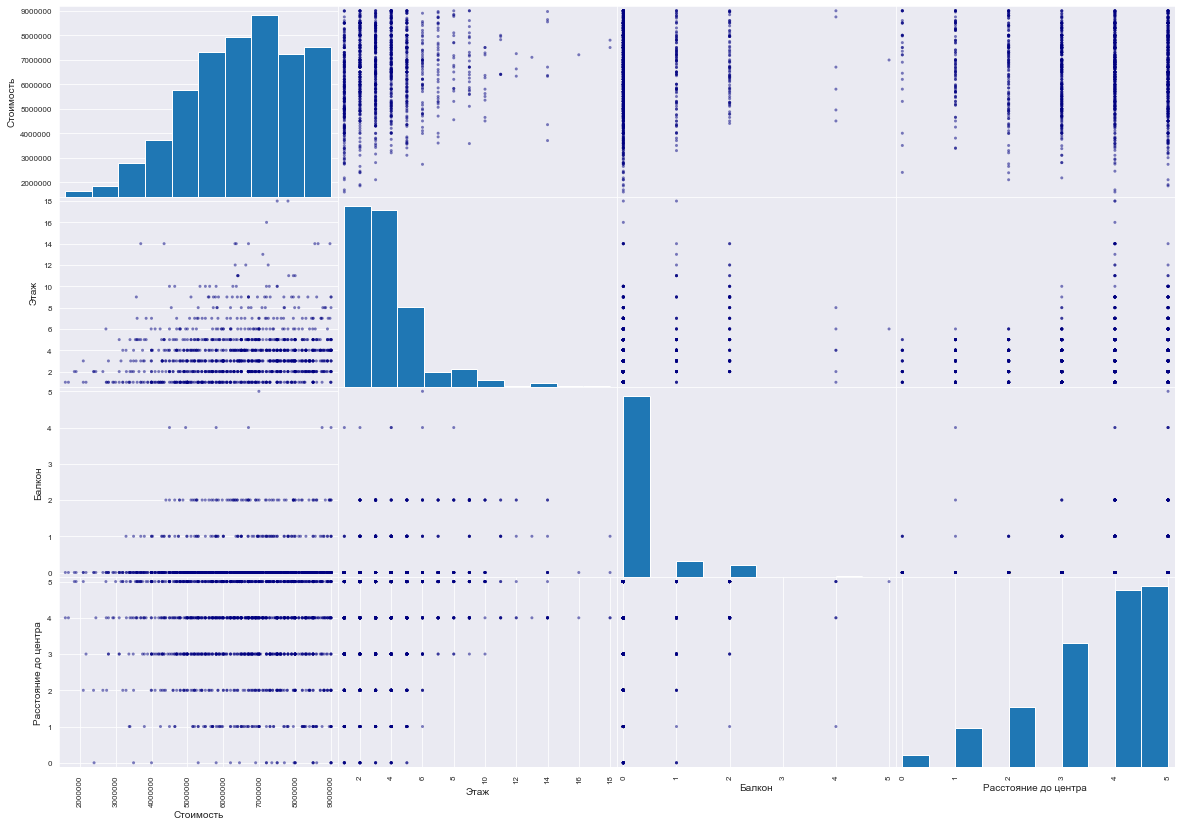

,Стоимость,Этаж,Балкон,Расстояние до центра
Стоимость,1.00,0.14,0.04,-0.06
Этаж,0.14,1.00,0.29,0.20
Балкон,0.04,0.29,1.00,0.18
Расстояние до центра,-0.06,0.20,0.18,1.00


In [101]:
spb_flat_char = spb_center[['Стоимость',
                            'Этаж', 'Балкон', 'Расстояние до центра']]
scatter_matrix(spb_flat_char, figsize=(20, 14), color='navy')
plt.show()
spb_flat_char.corr()

Эти параметры также не оказывают сильного влияния на стоимость, особенно в сравнении с влиянием площади квартиры на её стоимость.

**Посмотрим также как какое влияние оказывают на стоимость параметры в разных регионах:**

*Все объявления:*

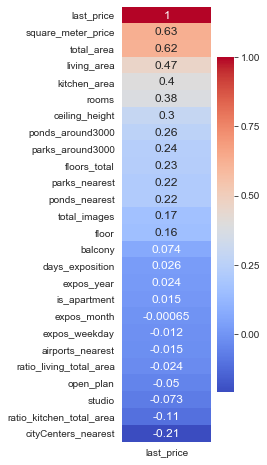

In [102]:
plt.figure(figsize=(2, 8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False),
            cmap="coolwarm", annot=True, annot_kws={'size': 12})
plt.show()

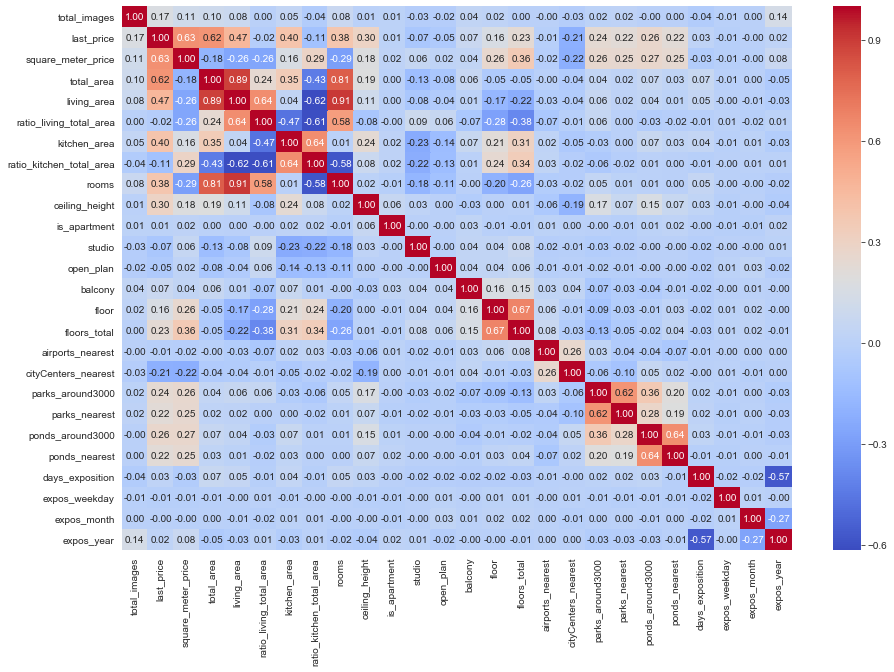

In [103]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f')

*Объявления в Санкт-Петербурге*

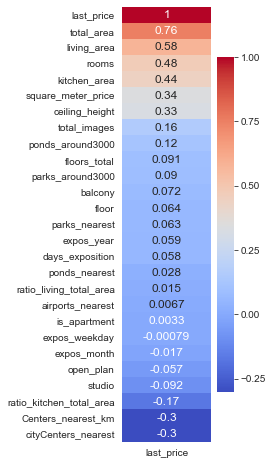

In [104]:
plt.figure(figsize=(2, 8))
sns.heatmap(spb_flat.corr()[['last_price']].sort_values(by='last_price', ascending=False),
            cmap="coolwarm", annot=True, annot_kws={'size': 12})
plt.show()

*Объявления в центре Санкт-Петербурга*

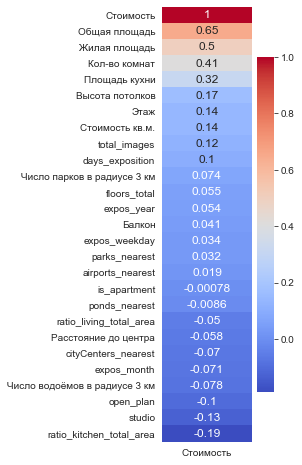

In [105]:
plt.figure(figsize=(2, 8))
sns.heatmap(spb_center.corr()[['Стоимость']].sort_values(by='Стоимость', ascending=False),
            cmap="coolwarm", annot=True, annot_kws={'size': 12})
plt.show()

Из данных выше мы можем увидеть,что *сильнее всего* на стоимость квартиры в сторону её увеличения влияют *общая площадь*, с небольшим уточнением, что для всех объявлений это параметр по значимости опережает только *стоимость квадратного метра*, в *TOP-5 параметров,* влияющих на стоимость, для всех срезов также можно включить значения *жилой площади, площади кухни, количество комнат* и *высоту потолков*. Стоит отметить, что многи из параметров оказывают довольно слабое влияние, но возможно, если попробовать их сгруппировать, то мы можем получить совершенно другие результаты.


## Общий вывод

При работе с исходными данными были выполнены следующие шаги:
- Предобработка данных: определение и заполнение пропущенных значений а также приведение данных к соответствующим типам;
- Подсчёт и добавление в таблицу следующих данных: цена квадратного метра; дата публикации(день, месяц, год), этаж квартиры (первый, последний, другой); отношения площадей (жилой и кухни к общей площади);
- Удалены аномальные значения в исходных данных;
- Проведён анализ как по всему датасету, так и с выделением отдельных груп (10 населённых пунктов с наибольшим числом объявлений и объявления в центре Санк-Петербурга).

По итогам проведённого анализа в целом можно сказать, что факторы, оказывающие влияние на стоимость квартиры одинаковы как для Санкт-Петербурга и его центра, так и для всей области.

Стоимость квартиры зависит в первую очередь от *общей площади помещения*. Следом идут *жилая площадь, площадь кухни* и *высота потолков*. Также заметно влияние на стоимость *этажа*, на котором расположена квартира. Тут всё как в крылатой фразе: "первый и последний не предлагать", заметно что крайние этажи у нашего народа не в почёте. Для Санкт-Петербурга, разумеется, на стоимость квартиры также влияет *расположение* - чем ближе к центру, тем, соответственно, дороже.  

Изучая время продажи были выявлено большое количество продаж на 45,60 и 90 дни, что совпадает с установленной для объявлений автоматической датой снятия с публикации, однако однозначно утверждать, проданы были квартиры в этот срок или нет мы не можем, фактор человеческой лени и забывчивости мы не можем исключать, для полной уверенности как поступать с этими данными желательно обратиться к специалистам, ответственным за сбор данной информации для получения дополнительных, уточняющих данных. В целом же время продажи квартиры колеблется от одного до трёх месяцев, а в среднем продажа занимает 75 дней.

Также на стоимость квартир влияет *дата размещения объявления*, пускай влияние это невелико, но нельзя не отметить, что квартиры размещённые в продаже в будние дни дороже, чем размещённые в выходные, то же самое можно сказать о летних месяцах - сезоне отпусков, а также, декабре, январе и мае, в эти месяцы стоимость также ниже, чем в остальные месяца.